In [11]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
erk.bond_price(5,100,0.05,12,0.03)

0    109.275393
dtype: float64

In [4]:
rates,zc_prices=erk.cir(10,500,b=0.03,r_0=0.03)
erk.bond_price(5,100,0.05,12,rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [5]:
erk.bond_price(5,100,0.05,12,rates.iloc[1][[1,2,3]])

1    108.542473
2    112.202460
3    108.489399
dtype: float64

In [6]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.031511,0.024072,0.031621
2,0.026706,0.022925,0.030527
3,0.031874,0.022265,0.030078
4,0.034409,0.021296,0.030967


In [7]:
# t=0, rates all equal to 0.03, as t goes on, int moves, bond prices move

<AxesSubplot:>

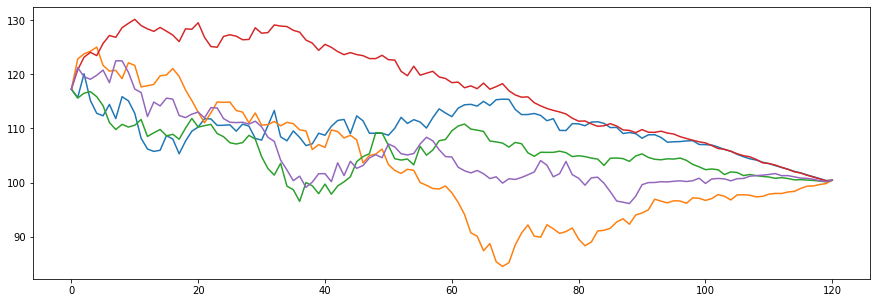

In [8]:
erk.bond_price(10,100,0.05,12,rates[[1,2,3,4,5]]).plot(legend=False,figsize=(15,5))
# a 10 year bond price change as int rate change, as times close to mature, there is not much room for fluctuation

In [9]:
prices=erk.bond_price(10,100,0.05,12,rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,115.729,122.853,115.627,120.843,121.254
2,120.125,123.816,116.524,123.185,119.574
3,115.174,124.287,116.817,124.09,119.102
4,112.805,125.058,115.883,123.486,119.843
...,...,...,...,...,...
116,101.409,99.3212,100.454,101.353,100.775
117,101.074,99.3634,100.383,101.016,100.6
118,100.742,99.6247,100.266,100.672,100.353
119,100.362,99.7991,100.135,100.326,100.165


In [10]:
# we want to generate random bond prices, then get bond return (price return + coupon return)

In [18]:
p=erk.bond_price(10,100,0.05,12,rates[[1,2,3,4]])
btr=erk.bond_total_return(p,100,0.05,12)
erk.annualized_rets(btr,12)

1    0.030588
2    0.034080
3    0.032404
4    0.027639
dtype: float64

In [20]:
price_10=erk.bond_price(10,100,0.05,12,rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.409,99.3212,100.454
117,101.074,99.3634,100.383
118,100.742,99.6247,100.266
119,100.362,99.7991,100.135
120,100.417,100.417,100.417


In [21]:
# bond price at the very end converge

In [22]:
price_30=erk.bond_price(30,100,0.05,12,rates)
price_30[[1,2,3]].tail()

,1,2,3
116,179.67,77.737,119.714
117,181.217,73.3429,122.418
118,185.104,75.9971,123.38
119,181.883,74.7213,123.722
120,181.628,81.2977,122.756


In [23]:
# still have dates to maturity, do they do not converge

In [24]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,135.787,155.251,135.525
2,147.867,158.465,138.102
3,134.809,160.298,139.135
4,128.961,163.089,136.908


In [25]:
rets_30=erk.bond_total_return(price_30,100,0.05,12)
rets_10=erk.bond_total_return(price_10,100,0.05,12)
# construct a new portfolio: 40-60 mix bond portfolio
rets_bond=0.6*rets_10+0.4*rets_30

In [26]:
# generate price and return for a stock portfolio

In [27]:
mean_rets_bonds=rets_bond.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,annualized return,annualized vol,skewness,kurtosis,cornish-fisher var 5%,historic cvar 5%,sharpe ratio,max drawdown
0,0.035939,0.003448,0.987654,5.345488,-0.00166,-0.001231,1.676289,0.0


In [28]:
price_eq=erk.gbm(10,500,0.07,0.15)
price_eq.shape

(121, 500)

In [29]:
rets_eq=price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [30]:
rets_bond.shape

(120, 500)

In [31]:
# construct a stock-bond 70-30 mix portfolio:
rets=0.7*rets_eq+0.3*rets_bond
rets_mean=rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,annualized return,annualized vol,skewness,kurtosis,cornish-fisher var 5%,historic cvar 5%,sharpe ratio,max drawdown
0,0.059092,0.004744,0.119682,2.688143,-0.002592,-0.002152,5.969103,0.0


In [32]:
# next: find asset allocation in stock and equity